In [6]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# download necessary data for NLTK
nltk.download('vader_lexicon')

# load the dataframe with first 100 rows

df = pd.read_csv('combined_dataset.csv')

# define function to map points to quality categories
def get_quality_category(points):
    if points >= 80 and points < 84:
        return 'normal quality'
    elif points >= 84 and points < 88:
        return 'good quality'
    elif points >= 88 and points < 92:
        return 'high quality'
    elif points >= 92 and points < 96:
        return 'very high quality'
    elif points >= 96 and points <= 100:
        return 'excellent quality'
    else:
        return 'unknown'

# define function to analyze sentiment of text
def analyze_sentiment(sentence):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(sentence)
    return sentiment_scores['compound']

# apply sentiment analysis to the 'description' column and create new column for sentiment scores
df['sentiment_score'] = df['description'].apply(analyze_sentiment)

# map points to quality categories and create new column for quality categories
df['quality_category'] = df['points'].apply(get_quality_category)

# group the dataframe by quality category and calculate the average sentiment score for each category
grouped_df = df.groupby('quality_category').agg({'sentiment_score': 'mean'})

# print the grouped dataframe
print(grouped_df)
df.to_csv('fulldataframe.csv', index=False)

                   sentiment_score
quality_category                  
excellent quality         0.777474
good quality              0.462221
high quality              0.574009
normal quality            0.163081
very high quality         0.678418


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/datalore/nltk_data...
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
import pandas as pd
df = pd.read_csv('fulldataframe.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217751 entries, 0 to 217750
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             217751 non-null  int64  
 1   country                217689 non-null  object 
 2   description            217751 non-null  object 
 3   designation            153317 non-null  object 
 4   points                 217751 non-null  int64  
 5   price                  200639 non-null  float64
 6   province               217689 non-null  object 
 7   region_1               182263 non-null  object 
 8   region_2               86245 non-null   object 
 9   taster_name            95001 non-null   object 
 10  taster_twitter_handle  90474 non-null   object 
 11  title                  119900 non-null  object 
 12  variety                217750 non-null  object 
 13  winery                 217751 non-null  object 
 14  sentiment_score        217751 non-nu

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.to_csv('dataset_with_sentimentscore.csv', index=False)

In [4]:
# COUNTRY+PROVINCE+VARIETY+WINERY+PRICE

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('dataset_with_sentimentscore.csv', delimiter=',')


df= df.dropna(subset=['country', 'province', 'variety', 'winery','price','points_nominal'])


df.info()
# Define input and output features
X = df[['country', 'province', 'variety', 'winery','price','sentiment_score']]
y = df['points_nominal']

# One-hot encode input features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Fit Gradient Boosting model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate model
score = model.score(X_test, y_test)
print('Accuracy:', score)
print(model.get_params())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188299 entries, 0 to 188298
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       188299 non-null  int64  
 1   country          188299 non-null  object 
 2   price            188299 non-null  float64
 3   province         188299 non-null  object 
 4   variety          188299 non-null  object 
 5   winery           188299 non-null  object 
 6   sentiment_score  188299 non-null  float64
 7   points_nominal   188299 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.9+ MB
Accuracy: 0.700477960701009
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [13]:
import pandas as pd

df.info()
df['sentiment_score'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217751 entries, 0 to 217750
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             217751 non-null  int64  
 1   country                217689 non-null  object 
 2   description            217751 non-null  object 
 3   designation            153317 non-null  object 
 4   points                 217751 non-null  int64  
 5   price                  217751 non-null  float64
 6   province               217689 non-null  object 
 7   region_1               182263 non-null  object 
 8   region_2               86245 non-null   object 
 9   taster_name            95001 non-null   object 
 10  taster_twitter_handle  90474 non-null   object 
 11  title                  119900 non-null  object 
 12  variety                217750 non-null  object 
 13  winery                 217751 non-null  object 
 14  sentiment_score        217751 non-nu

count 217751.000000
mean 0.525181
std 0.372640
min -0.928800
25% 0.318200
50% 0.639500
75% 0.827100
max 0.993700
Name: sentiment_score, dtype: float64

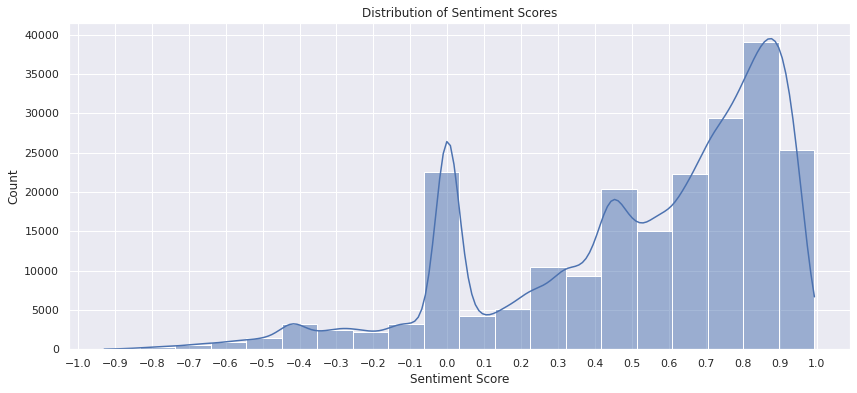

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(14,6)})

# Create histogram plot with seaborn
ax = sns.histplot(data=df, x='sentiment_score', bins=20, kde=True)

# Set x-axis tick marks to be -1 to 1 in steps of 0.1 units apart
ax.set_xticks([i/10 for i in range(-10, 11)])

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')

# Show the plot
plt.show()

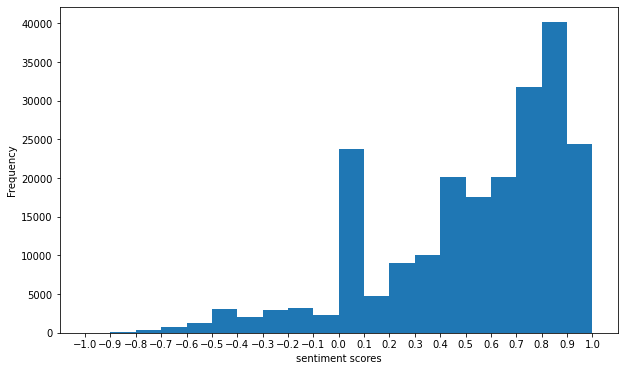

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, range=(-1, 1))
plt.xlabel('sentiment scores')
plt.ylabel('Frequency')
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.show()

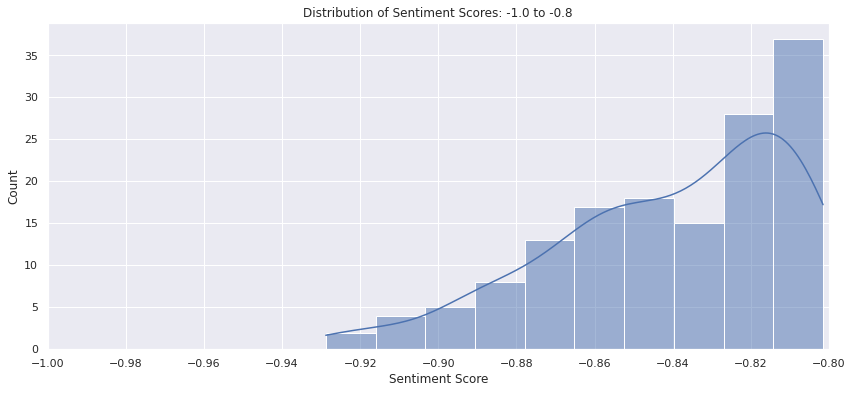

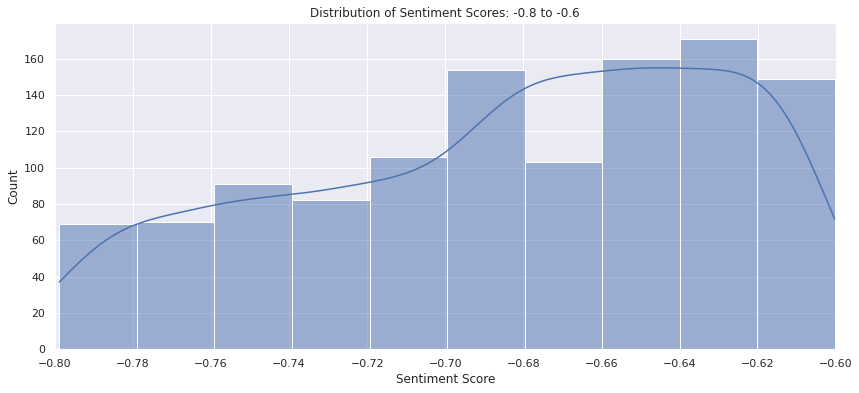

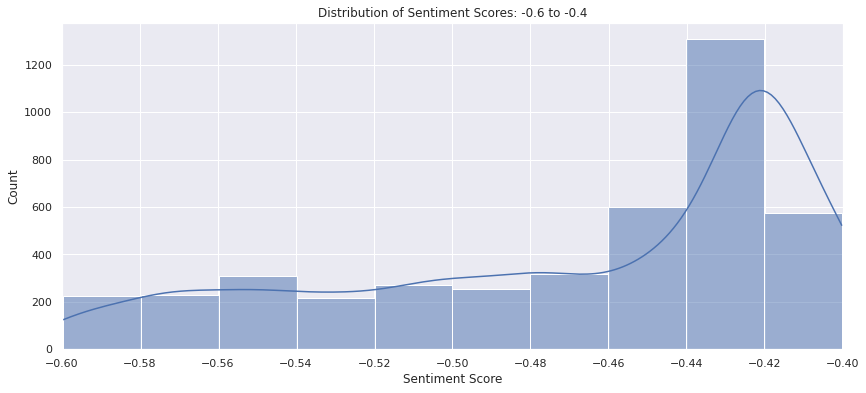

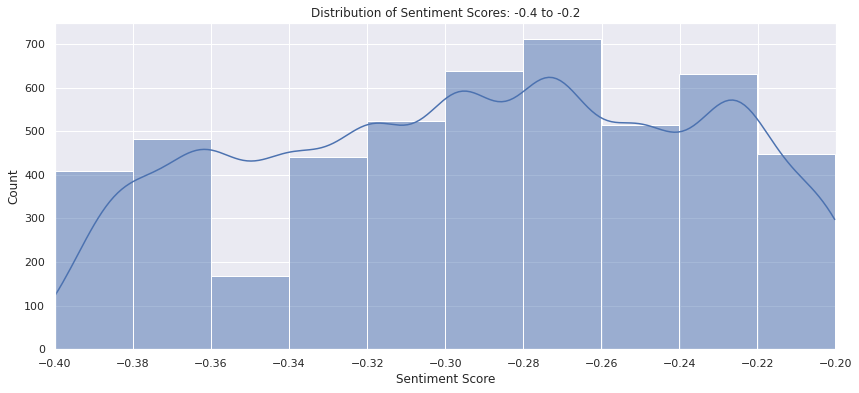

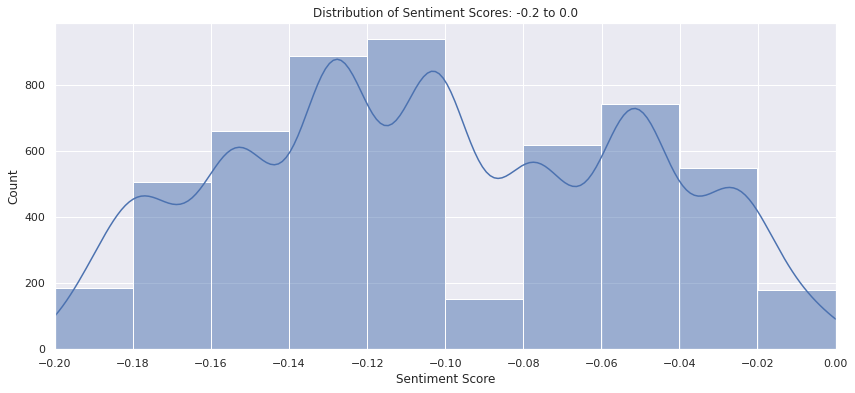

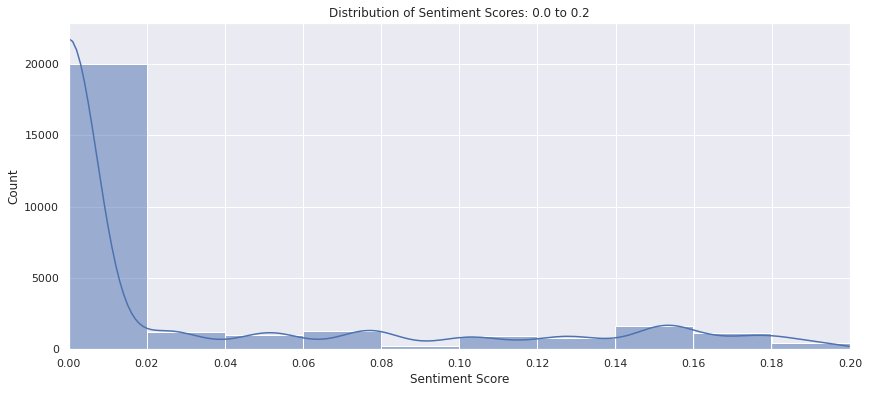

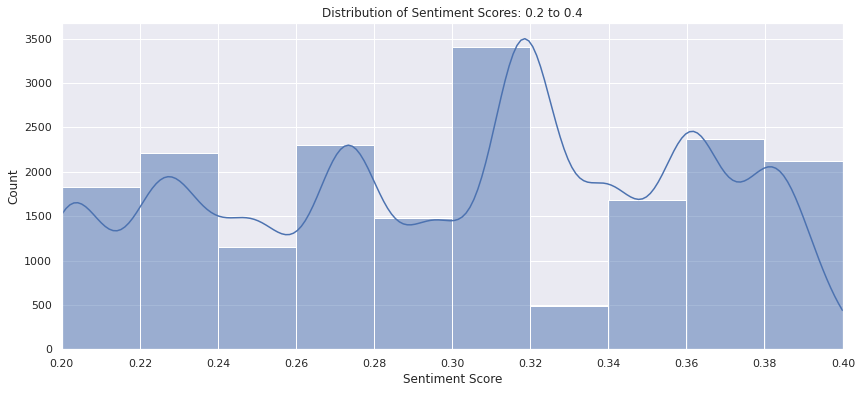

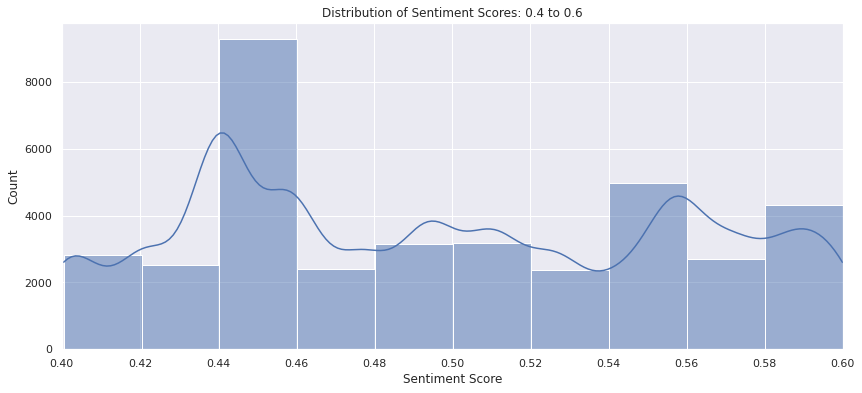

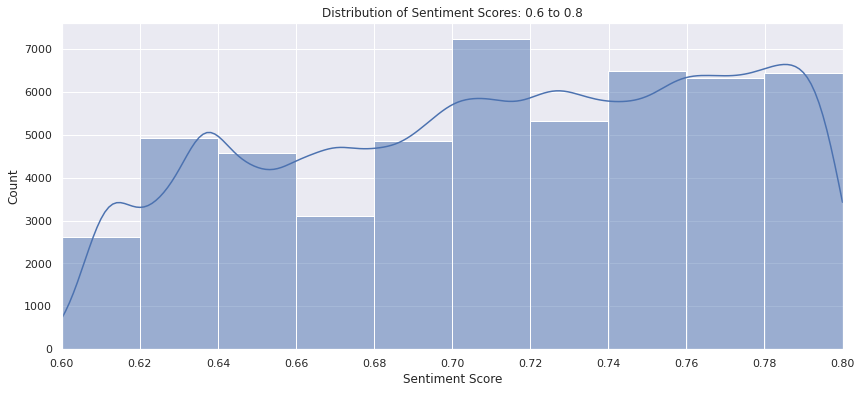

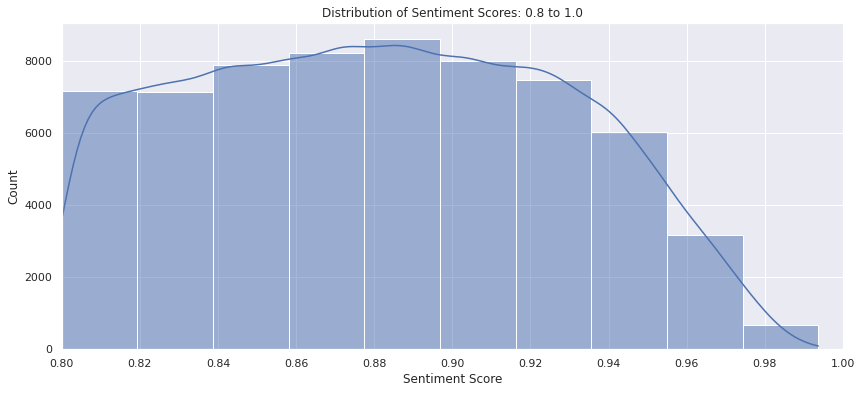

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(14,6)})

# Define bin edges for histogram plots
bin_edges = [i/5 for i in range(-5, 6)]

# Loop through bin edges and create a histogram plot for each interval
for i in range(len(bin_edges)-1):
    # Select data within the bin range
    data = df[(df['sentiment_score'] >= bin_edges[i]) & (df['sentiment_score'] < bin_edges[i+1])]
    
    # Create histogram plot with seaborn
    ax = sns.histplot(data=data, x='sentiment_score', bins=10, kde=True)
    
    # Set x-axis tick marks
    ax.set_xticks([i/50 for i in range(-50, 51)])
    
    # Set x-axis limits to the bin range
    ax.set_xlim([bin_edges[i], bin_edges[i+1]])
    
    # Add labels and title
    plt.xlabel('Sentiment Score')
    plt.ylabel('Count')
    plt.title(f'Distribution of Sentiment Scores: {bin_edges[i]:.1f} to {bin_edges[i+1]:.1f}')
    
    # Show the plot
    plt.show()

R-score: 0.32907297533495755


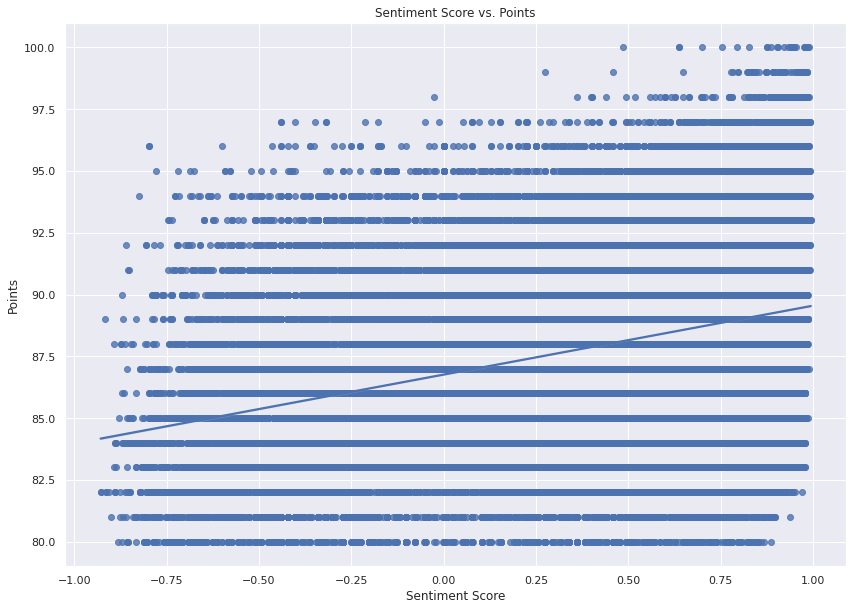

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(14,10)})

# Create scatter plot with seaborn and add trend line
sns.regplot(data=df, x='sentiment_score', y='points')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Points')
plt.title('Sentiment Score vs. Points')

# Show the plot
plt.show()

# Calculate R-score
corr = df['sentiment_score'].corr(df['points'])
print('R-score:', corr)

R-score: 0.9676585715655905


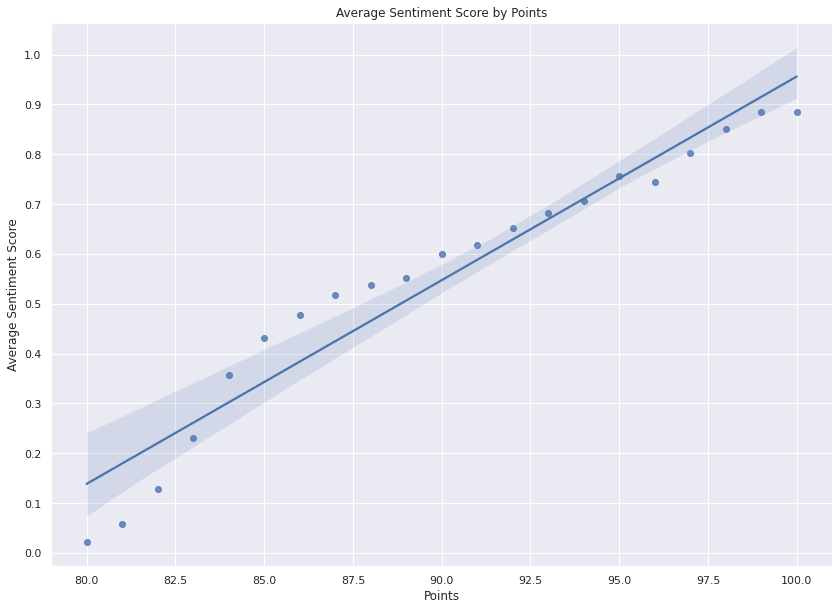

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Group data by 'points' and calculate average 'sentiment_score'
grouped_data = df.groupby('points').mean().reset_index()

# Set plot style and size
sns.set(rc={'figure.figsize':(14,10)})

# Create scatter plot with seaborn
sns.regplot(data=grouped_data, x='points', y='sentiment_score')

# Add labels and title
plt.xlabel('Points')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Points')

# Set y-axis tick interval to 0.1 units
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Calculate R-score
r = np.corrcoef(grouped_data['points'], grouped_data['sentiment_score'])[0, 1]
print('R-score:', r)

# Show the plot
plt.show()

R-score: 0.9707782166435457


/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


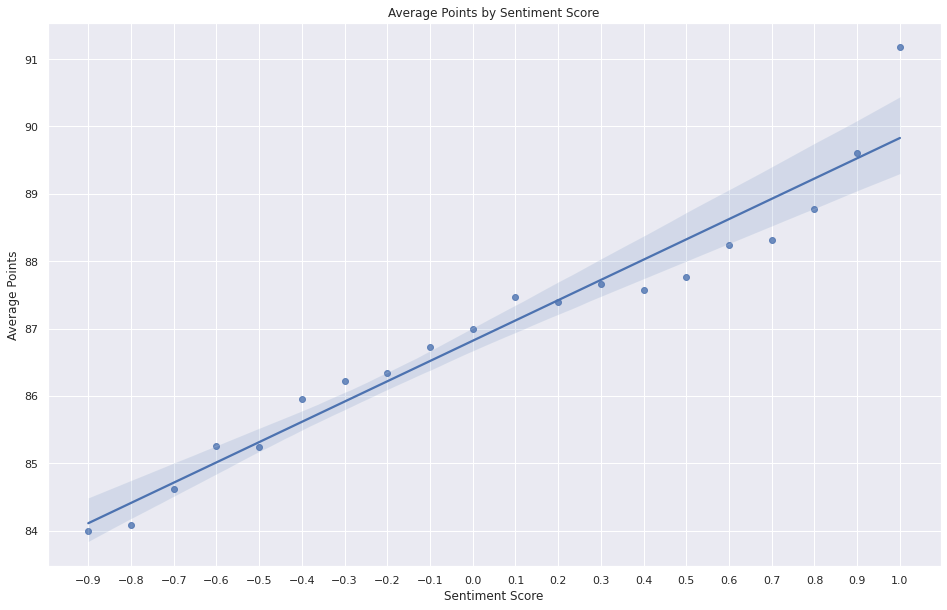

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

df= pd.read_csv('fulldataframe.csv')

# Round the 'sentiment_score' to the nearest 0.1
df['rounded_sentiment'] = df['sentiment_score'].round(1)

# Group data by 'rounded_sentiment' and calculate average 'points'
grouped_data = df.groupby('rounded_sentiment')['points'].mean().reset_index()

# Set plot style and size
sns.set(rc={'figure.figsize':(16,10)})

# Create scatter plot with seaborn
sns.regplot(data=grouped_data, x='rounded_sentiment', y='points')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Average Points')
plt.title('Average Points by Sentiment Score')

# Set x-axis tick interval to 0.1 units
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))

# Calculate R-score
r = np.corrcoef(grouped_data['rounded_sentiment'], grouped_data['points'])[0, 1]
print('R-score:', r)

# Show the plot
plt.show()

In [4]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

df = pd.read_csv('fulldataframe.csv')

df.info()

df = df.dropna(subset=['country', 'province', 'variety', 'winery','price','quality_category'])
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
# drop the outlier rows from the DataFrame
df = df.drop(outliers.index)

# Define input and output features
X = df[['country', 'province', 'variety', 'winery','price','sentiment_score']]
y = df['quality_category']

# One-hot encode input features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Fit Gradient Boosting model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate model
score = model.score(X_test, y_test)
print('Train/Test Split Accuracy:', score)

# Fit Decision Tree model with 10-fold cross-validation
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_encoded, y, cv=10)

# Print the average accuracy and standard deviation
print('10-fold Accuracy:',scores.mean(), 'std:' ,scores.std() * 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217751 entries, 0 to 217750
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             217751 non-null  int64  
 1   country                217689 non-null  object 
 2   description            217751 non-null  object 
 3   designation            153317 non-null  object 
 4   points                 217751 non-null  int64  
 5   price                  200639 non-null  float64
 6   province               217689 non-null  object 
 7   region_1               182263 non-null  object 
 8   region_2               86245 non-null   object 
 9   taster_name            95001 non-null   object 
 10  taster_twitter_handle  90474 non-null   object 
 11  title                  119900 non-null  object 
 12  variety                217750 non-null  object 
 13  winery                 217751 non-null  object 
 14  sentiment_score        217751 non-nu

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

# Read in the data
df = pd.read_csv('fulldataframe.csv')

# Drop rows with missing values
df = df.dropna(subset=['country', 'province', 'variety', 'winery', 'price', 'quality_category', 'sentiment_score'])

# Identify and remove outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
df = df.drop(outliers.index)

# Split the data into two sets based on sentiment score
epsilon = 0.02
df_low_sentiment = df[df['sentiment_score'] <= -epsilon]
df_high_sentiment = df[df['sentiment_score'] >= epsilon]

# Define input and output features for the low sentiment model
X_low = df_low_sentiment[['country', 'province', 'variety', 'winery', 'price']]
y_low = df_low_sentiment['quality_category']

# One-hot encode input features
encoder = OneHotEncoder()
X_low_encoded = encoder.fit_transform(X_low)

# Split data into training and testing sets
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low_encoded, y_low, test_size=0.2, random_state=42)

# Fit Decision Tree model for low sentiment
model_low = DecisionTreeClassifier()
model_low.fit(X_train_low, y_train_low)

# Evaluate model for low sentiment
score_low = model_low.score(X_test_low, y_test_low)
print('Train/Test Split Accuracy for low sentiment:', score_low)

# Fit Decision Tree model with 10-fold cross-validation for low sentiment
scores_low = cross_val_score(model_low, X_low_encoded, y_low, cv=10)

# Print the average accuracy and standard deviation for low sentiment
print('10-fold Accuracy for low sentiment:',scores_low.mean(), 'std:' ,scores_low.std() * 2)


# Define input and output features for the high sentiment model
X_high = df_high_sentiment[['country', 'province', 'variety', 'winery', 'price']]
y_high = df_high_sentiment['quality_category']

# One-hot encode input features
X_high_encoded = encoder.fit_transform(X_high)

# Split data into training and testing sets
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_encoded, y_high, test_size=0.2, random_state=42)

# Fit Decision Tree model for high sentiment
model_high = DecisionTreeClassifier()
model_high.fit(X_train_high, y_train_high)

# Evaluate model for high sentiment
score_high = model_high.score(X_test_high, y_test_high)
print('Train/Test Split Accuracy for high sentiment:', score_high)

# Fit Decision Tree model with 10-fold cross-validation for high sentiment
scores_high = cross_val_score(model_high, X_high_encoded, y_high, cv=10)

# Print the average accuracy and standard deviation for high sentiment
print('10-fold Accuracy for high sentiment:',scores_high.mean(), 'std:' ,scores_high.std() * 2)

Train/Test Split Accuracy for low sentiment: 0.6516814159292036
10-fold Accuracy for low sentiment: 0.6863314447592068 std: 0.09298303622846509
Train/Test Split Accuracy for high sentiment: 0.6679279163727313
10-fold Accuracy for high sentiment: 0.6892151415478068 std: 0.05215250671798507


/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df_low_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14123 entries, 2 to 217741
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14123 non-null  int64  
 1   country                14123 non-null  object 
 2   description            14123 non-null  object 
 3   designation            9741 non-null   object 
 4   points                 14123 non-null  int64  
 5   price                  14123 non-null  float64
 6   province               14123 non-null  object 
 7   region_1               11788 non-null  object 
 8   region_2               5450 non-null   object 
 9   taster_name            6742 non-null   object 
 10  taster_twitter_handle  6513 non-null   object 
 11  title                  7925 non-null   object 
 12  variety                14123 non-null  object 
 13  winery                 14123 non-null  object 
 14  sentiment_score        14123 non-null  float64
 15  q

In [3]:
df_high_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155928 entries, 1 to 217750
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             155928 non-null  int64  
 1   country                155928 non-null  object 
 2   description            155928 non-null  object 
 3   designation            108517 non-null  object 
 4   points                 155928 non-null  int64  
 5   price                  155928 non-null  float64
 6   province               155928 non-null  object 
 7   region_1               129779 non-null  object 
 8   region_2               67959 non-null   object 
 9   taster_name            66422 non-null   object 
 10  taster_twitter_handle  62580 non-null   object 
 11  title                  85441 non-null   object 
 12  variety                155928 non-null  object 
 13  winery                 155928 non-null  object 
 14  sentiment_score        155928 non-nu

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Load data
df = pd.read_csv('dataset_with_sentimentscore.csv', delimiter=',')

df = df.dropna(subset=['country', 'province', 'variety', 'winery','price','points_nominal'])

# Define input and output features
X = df[['country', 'province', 'variety', 'winery','price','sentiment_score']]
y = df['points_nominal']

# One-hot encode input features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Fit Decision Tree model with 10-fold cross-validation
model = DecisionTreeClassifier()
scoring = ['accuracy', 'f1_macro']
cv_results = cross_validate(model, X_encoded, y, cv=10, scoring=scoring)

# Print the results
print('Accuracy:', cv_results['test_accuracy'].mean(), 'std:', cv_results['test_accuracy'].std() * 2)
print('F1-macro:', cv_results['test_f1_macro'].mean(), 'std:', cv_results['test_f1_macro'].std() * 2)

Accuracy: 0.7333439795964503 std: 0.07446770036647712
F1-macro: 0.6622695300103094 std: 0.09519898971309461


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

# Load data
df = pd.read_csv('dataset_with_sentimentscore.csv', delimiter=',')

df = df.dropna(subset=['country', 'province', 'variety', 'winery','price','points_nominal'])

# Define input and output features
X = df[['country', 'province', 'variety', 'winery','price','sentiment_score']]
y = df['points_nominal']

# One-hot encode input features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Fit XGBoost model with 10-fold cross-validation
model = XGBClassifier()
scoring = ['accuracy', 'f1_macro']
cv_results = cross_validate(model, X_encoded, y, cv=10, scoring=scoring)

# Print the results
print('Accuracy:', cv_results['test_accuracy'].mean(), 'std:', cv_results['test_accuracy'].std() * 2)
print('F1-macro:', cv_results['test_f1_macro'].mean(), 'std:', cv_results['test_f1_macro'].std() * 2)

[13:30:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

# Load data
df = pd.read_csv('dataset_with_sentimentscore.csv', delimiter=',')

df = df.dropna(subset=['country', 'province', 'variety', 'winery','price','points_nominal'])

# Define input and output features
X = df[['country', 'province', 'variety', 'winery','price','sentiment_score']]
y = df['points_nominal']

# One-hot encode input features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Create AdaBoost model with Decision Tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100)

# Evaluate model with 10-fold cross-validation
scoring = ['accuracy', 'f1_macro']
cv_results = cross_validate(model, X_encoded, y, cv=10, scoring=scoring)

# Print the results
print('Accuracy:', cv_results['test_accuracy'].mean(), 'std:', cv_results['test_accuracy'].std() * 2)
print('F1-macro:', cv_results['test_f1_macro'].mean(), 'std:', cv_results['test_f1_macro'].std() * 2)

Accuracy: 0.5435026841201864 std: 0.010430029139820487
F1-macro: 0.3022426225748242 std: 0.013620822291358706
